In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import QuantileTransformer, Normalizer
import statsmodels.api as sm
%matplotlib inline

##Load data

In [97]:
num_prev_blocks = 50

In [98]:
df = pd.read_csv('./../data/data_filtered.csv')

In [99]:
df_avg = pd.read_csv('./../data/block_avg_{}.csv'.format(num_prev_blocks))

In [130]:
np.unique(df['block_id'].values).shape

(14473,)

##Merge data

In [100]:
df.columns

Index([u'Unnamed: 0', u'hash_t', u'accountNonce', u'amount', u'block_id',
       u'gasLimit_t', u'gasUsed_t', u'newContract', u'price', u'time_t',
       u'txIndex', u'type', u'blockTime', u'difficulty', u'gasLimit_b',
       u'gasUsed_b', u'reward', u'size', u'time_b', u'totalFee', u'tx_count',
       u'uncle_count', u'amount_binary', u'price_gwei', u'day', u'hour',
       u'minute', u'second', u'dayofweek', u'amount_eth', u'type_enc',
       u'txcnt_second', u'avg_gasUsed_t_perblock', u'avg_price_perblock'],
      dtype='object')

In [101]:
df_avg.columns

Index([u'Unnamed: 0', u'avg_blocktime', u'avg_gasUsed_b', u'avg_tx_count',
       u'avg_uncle_count', u'avg_difficulty', u'avg_txcnt_second',
       u'avg_gasUsed_t', u'avg_price', u'blockids'],
      dtype='object')

In [102]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [103]:
df_avg.drop('Unnamed: 0', axis=1, inplace=True)

In [104]:
df_avg.shape

(14473, 9)

In [105]:
df.shape[1] + df_avg.shape[1]

42

In [106]:
df_avg.head()

,avg_blocktime,avg_gasUsed_b,avg_tx_count,avg_uncle_count,avg_difficulty,avg_txcnt_second,avg_gasUsed_t,avg_price,blockids
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4286251
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4286252
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4286253
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4286254
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4286255


In [107]:
merged = pd.merge(df, df_avg, left_on='block_id', right_on='blockids')

In [108]:
merged.columns

Index([u'hash_t', u'accountNonce', u'amount', u'block_id', u'gasLimit_t',
       u'gasUsed_t', u'newContract', u'price', u'time_t', u'txIndex', u'type',
       u'blockTime', u'difficulty', u'gasLimit_b', u'gasUsed_b', u'reward',
       u'size', u'time_b', u'totalFee', u'tx_count', u'uncle_count',
       u'amount_binary', u'price_gwei', u'day', u'hour', u'minute', u'second',
       u'dayofweek', u'amount_eth', u'type_enc', u'txcnt_second',
       u'avg_gasUsed_t_perblock', u'avg_price_perblock', u'avg_blocktime',
       u'avg_gasUsed_b', u'avg_tx_count', u'avg_uncle_count',
       u'avg_difficulty', u'avg_txcnt_second', u'avg_gasUsed_t', u'avg_price',
       u'blockids'],
      dtype='object')

In [109]:
merged.shape

(631783, 42)

In [110]:
#find null values
for col in merged.columns:
    print(col, merged[col].isnull().sum())

('hash_t', 0)
('accountNonce', 0)
('amount', 0)
('block_id', 0)
('gasLimit_t', 0)
('gasUsed_t', 0)
('newContract', 0)
('price', 0)
('time_t', 0)
('txIndex', 535592)
('type', 0)
('blockTime', 0)
('difficulty', 0)
('gasLimit_b', 0)
('gasUsed_b', 0)
('reward', 0)
('size', 0)
('time_b', 0)
('totalFee', 0)
('tx_count', 0)
('uncle_count', 0)
('amount_binary', 0)
('price_gwei', 0)
('day', 0)
('hour', 0)
('minute', 0)
('second', 0)
('dayofweek', 0)
('amount_eth', 0)
('type_enc', 0)
('txcnt_second', 0)
('avg_gasUsed_t_perblock', 0)
('avg_price_perblock', 0)
('avg_blocktime', 4592)
('avg_gasUsed_b', 4592)
('avg_tx_count', 4592)
('avg_uncle_count', 4592)
('avg_difficulty', 4592)
('avg_txcnt_second', 4592)
('avg_gasUsed_t', 4592)
('avg_price', 4592)
('blockids', 0)


In [111]:
merged.drop('txIndex', axis=1, inplace=True)

In [112]:
merged.dropna(inplace=True)

In [113]:
#find null values
for col in merged.columns:
    print(col, merged[col].isnull().sum())

('hash_t', 0)
('accountNonce', 0)
('amount', 0)
('block_id', 0)
('gasLimit_t', 0)
('gasUsed_t', 0)
('newContract', 0)
('price', 0)
('time_t', 0)
('type', 0)
('blockTime', 0)
('difficulty', 0)
('gasLimit_b', 0)
('gasUsed_b', 0)
('reward', 0)
('size', 0)
('time_b', 0)
('totalFee', 0)
('tx_count', 0)
('uncle_count', 0)
('amount_binary', 0)
('price_gwei', 0)
('day', 0)
('hour', 0)
('minute', 0)
('second', 0)
('dayofweek', 0)
('amount_eth', 0)
('type_enc', 0)
('txcnt_second', 0)
('avg_gasUsed_t_perblock', 0)
('avg_price_perblock', 0)
('avg_blocktime', 0)
('avg_gasUsed_b', 0)
('avg_tx_count', 0)
('avg_uncle_count', 0)
('avg_difficulty', 0)
('avg_txcnt_second', 0)
('avg_gasUsed_t', 0)
('avg_price', 0)
('blockids', 0)


(0, 100)

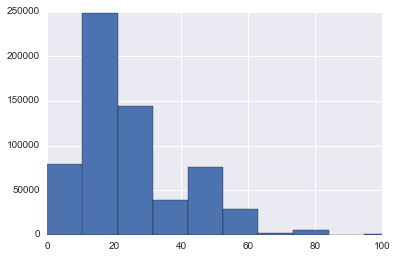

In [114]:
merged['price_gwei'].hist(bins=2000)
plt.xlim(0,100)

In [115]:
np.log(merged['price_gwei'].values)

array([ 3.04452244,  3.04452244,  3.04452244, ...,  3.04452244,
        3.04452244,  3.40119738])

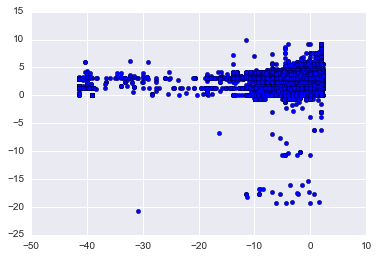

In [116]:
plt.scatter(np.log(merged['amount_eth'].values), np.log(merged['price_gwei'].values))

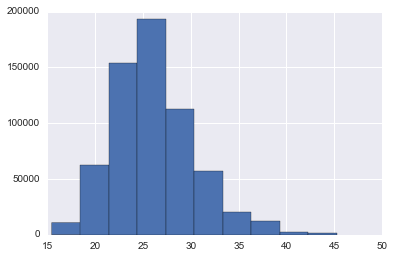

In [117]:
merged['avg_blocktime'].hist()

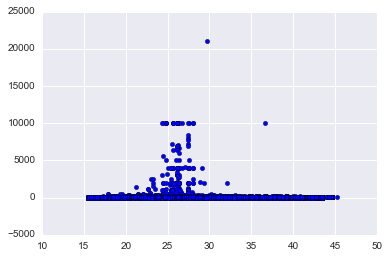

In [118]:
plt.scatter(merged['avg_blocktime'], merged['price_gwei'])

#Select features for modeling

In [119]:
features = [
        'newContract',
        'day',
        'hour',
        'dayofweek',
        'amount_eth',
        'type_enc',
        'avg_price',
        'avg_blocktime',
        'avg_gasUsed_b',
        'avg_tx_count',
        'avg_uncle_count',
        'avg_difficulty',
        'avg_txcnt_second',
        'avg_gasUsed_t'
        ]
X = merged[features].values
y = merged['price_gwei'].values
X_train, X_test, y_train, y_test = train_test_split(X, y)

###Scale features

In [120]:
#sklearn quantile transformer
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=0)
X_train_trans = quantile_transformer.fit_transform(X_train)
X_test_trans = quantile_transformer.transform(X_test)

In [121]:
#normalize
normalizer = Normalizer().fit(X_train)
X_train_norm = normalizer.transform(X_train) 
normalizer = Normalizer().fit(X_test)
X_test_norm = normalizer.transform(X_test) 

##Linear regression

In [122]:
def linear_regression(X_train, X_test, y_train, y_test):
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    scores = cross_val_score(lr, X_train, y_train, scoring='r2', cv=5)
    print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))
    print('R2_score: {}'.format(r2_score(y_test, y_pred)))
    print('avg_CV_score: {}'.format(np.mean(scores)))
    return lr

In [123]:
linear_regression(X_train, X_test, y_train, y_test)

MSE: 4377.97056813
R2_score: 0.0153912517529
avg_CV_score: 0.0108264076429


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [124]:
# get summary statistics from statsmodels
model = sm.OLS(y_train, X_train)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     860.2
Date:                Fri, 29 Sep 2017   Prob (F-statistic):               0.00
Time:                        12:36:42   Log-Likelihood:            -2.7850e+06
No. Observations:              470393   AIC:                         5.570e+06
Df Residuals:                  470388   BIC:                         5.570e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          4.454e-07   2.38e-08     18.753      0.000    3.99e-07    4.92e-07
x2             0.0432      0.006      6.984      0.000       0.031       0.055
x3             0.1114      0.020      5.553      0.000       0.072       0.151
x4            -0.0191      0.003     -6.954      0.000      -0.024      -0.014
x5             0.0414      0.001     40.245      0.000       0.039       0.043
x6             0.0123      0.001     15.328      0.000       0.011       0.014
x7             0.8765      0.016     56.383      0.000       0.846       0.907
x8             0.2553      0.031      8.345      0.000       0.195       0.315
x9          6.007e-07   2.25e-07      2.675      0.007    1.61e-07    1.04e-06
x10            0.0057      0.007      0.825      0.409      -0.008       0.019
x11        -8.148e-05   2.86e-05     -2.848      0.004      -0.000   -2.54e-05
x12        -2.592e-15   3.16e-16     -8.202      0.000   -3.21e-15   -1.97e-15
x13           -0.1280      0.010    -12.954      0.000      -0.147      -0.109
x14        -5.374e-05   7.87e-06     -6.828      0.000   -6.92e-05   -3.83e-05
==============================================================================
Omnibus:                  1876667.712   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    3664244044152.601
Skew:                         101.656   Prob(JB):                         0.00
Kurtosis:                   13674.601   Cond. No.                     8.11e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.11e+17. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [125]:
for num, col in enumerate(merged[features].columns):
    print(num+1, col)

(1, 'newContract')
(2, 'day')
(3, 'hour')
(4, 'dayofweek')
(5, 'amount_eth')
(6, 'type_enc')
(7, 'avg_price')
(8, 'avg_blocktime')
(9, 'avg_gasUsed_b')
(10, 'avg_tx_count')
(11, 'avg_uncle_count')
(12, 'avg_difficulty')
(13, 'avg_txcnt_second')
(14, 'avg_gasUsed_t')


###Plot the avg MSE with respect to the number of blocks used
- Need to determine how many previous blocks to look at in order to get predictive features

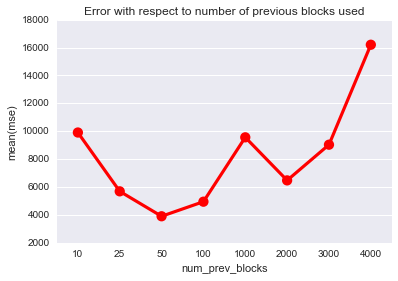

In [131]:
mse=[9906, 5689.59, 3902.42, 4946.9, 9560.67, 6474.36, 9032.47, 16197.49]
num_prev = [10, 25, 50, 100, 1000, 2000, 3000, 4000]
results = pd.DataFrame({'num_prev_blocks': num_prev, 'mse': mse})
sns.pointplot(x="num_prev_blocks", y="mse", data=results, color='r')
plt.title('Error with respect to number of previous blocks used')
plt.savefig('mse_prev_blocks.png')

The MSE seems to be minimal when using 50 previous blocks

##KNN regression

In [359]:
def knn_regressor(X_train, X_test, y_train, y_test):
    model = KNeighborsRegressor(n_neighbors=5, metric='cosine', weights='uniform')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('CV score: {} | MSE: {} | R^2: {}'.format(np.mean(cross_val_score(model, X_train, y_train)), 
                                                    mean_squared_error(y_test, y_pred), 
                                                    r2_score(y_test, y_pred)))

In [ ]:
knn_regressor(X_train, X_test, y_train, y_test)

##Random forest regressor

In [305]:
def rf_regressor(X_train, X_test, y_train, y_test):
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    scores = cross_val_score(rf, X_train, y_train, scoring='r2', cv=5)
    print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))
    print('R2_score: {}'.format(r2_score(y_test, y_pred)))
    print('avg_CV_score: {}'.format(np.mean(scores)))
    return rf

In [306]:
model = rf_regressor(X_train, X_test, y_train, y_test)

MSE: 4983.90094258
R2_score: 0.195149541928
avg_CV_score: -0.0423348531275


In [309]:
def plot_feature_importance(rf, feature_df):
    cols = []
    for col in feature_df.columns:
        cols.append(col)

    feat_scores = pd.DataFrame({'Fraction of Samples Affected' : rf.feature_importances_},
                           index=cols)
    feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')
    feat_scores.plot(kind='barh', color='r', figsize=(6,6))
    plt.xlabel('Importance', fontsize=18)
    plt.title('Feature Importance', fontsize=18)
    plt.savefig('feat_import_50.png')

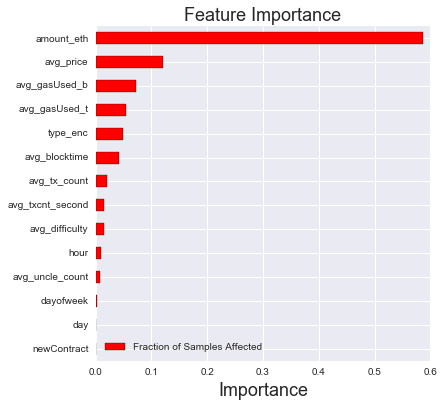

In [310]:
plot_feature_importance(model, merged[features])